In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!java -version

openjdk version "11.0.3" 2019-04-16
OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1)
OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)


In [6]:
!wget "http://www-eu.apache.org/dist/spark/spark-2.3.3/spark-2.3.3-bin-hadoop2.6.tgz"
!tar -xvf spark-2.3.3-bin-hadoop2.6.tgz

--2019-07-20 08:21:31--  http://www-eu.apache.org/dist/spark/spark-2.3.3/spark-2.3.3-bin-hadoop2.6.tgz
Resolving www-eu.apache.org (www-eu.apache.org)... 95.216.24.32, 2a01:4f9:2a:185f::2
Connecting to www-eu.apache.org (www-eu.apache.org)|95.216.24.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223791959 (213M) [application/x-gzip]
Saving to: ‘spark-2.3.3-bin-hadoop2.6.tgz’

spark-2.3.3-bin-had 100%[===================>] 213.42M  15.9MB/s    in 15s     

2019-07-20 08:21:46 (14.6 MB/s) - ‘spark-2.3.3-bin-hadoop2.6.tgz’ saved [223791959/223791959]

spark-2.3.3-bin-hadoop2.6/
spark-2.3.3-bin-hadoop2.6/bin/
spark-2.3.3-bin-hadoop2.6/bin/beeline
spark-2.3.3-bin-hadoop2.6/bin/beeline.cmd
spark-2.3.3-bin-hadoop2.6/bin/docker-image-tool.sh
spark-2.3.3-bin-hadoop2.6/bin/find-spark-home
spark-2.3.3-bin-hadoop2.6/bin/find-spark-home.cmd
spark-2.3.3-bin-hadoop2.6/bin/load-spark-env.cmd
spark-2.3.3-bin-hadoop2.6/bin/load-spark-env.sh
spark-2.3.3-bin-hadoop2.6/bin/pysp

In [7]:
!pip install findspark
!pip install systemml

     |████████████████████████████████| 9.7MB 3.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/cf/07/79/b3ed6f12afe06b2ab55d60dcfd62e66240f5d8c6088a518177
Successfully built systemml


In [0]:
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.3-bin-hadoop2.6"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [12]:
df = spark.createDataFrame([{"hello":"world"} for x in range(1000)])
df.show(1)

+-----+
|hello|
+-----+
|world|
+-----+
only showing top 1 row



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
import tensorflow as tf

from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam


In [30]:
!pip install gdown
import gdown

#gdown.download("https://drive.google.com/uc?id={0}".format("1c-p-K9vG5Ijh8A6anvUpwuf21eClvV99"),"gt.pickle",quiet= False)
#gdown.download("https://drive.google.com/uc?id={0}".format("1lCgm8ooBaTeLYI_9Q13015BgrVDY0FPy"),"occ.pickle",quiet= False)
gdown.download("https://drive.google.com/uc?id={0}".format("1lCgm8ooBaTeLYI_9Ql30l5BgrVDY0FPy"),"occ.pickle",quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1lCgm8ooBaTeLYI_9Ql30l5BgrVDY0FPy
To: /content/occ.pickle
221MB [00:04, 49.6MB/s]


'occ.pickle'

In [0]:
import io 
with open("occ.pickle","rb") as pickle_dosyam:
  x = pickle.load(pickle_dosyam)

y = x  

In [0]:
from skimage.transform import resize

x = resize(x, (len(x),64,64,1),anti_aliasing=False)

y= resize(y, (len(y),64,64,1),anti_aliasing=False)

 

 

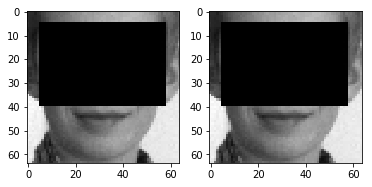

In [33]:
fig = plt.figure(figsize = (6,6))

fig.add_subplot(1,2,1)

plt.imshow(x[10,:,:,0], cmap = "gray")

fig.add_subplot(1,2,2)

plt.imshow(y[10,:,:,0], cmap = "gray")

In [34]:
from keras.models import Sequential

modelim = Sequential()
modelim.add(Dense(16, input_shape = [64*64], activation = "relu"))
modelim.add(BatchNormalization())
modelim.add(Dropout(0.3))

modelim.add(Dense(64*64, activation = "relu"))
modelim.add(BatchNormalization())
modelim.add(Dropout(0.3))

modelim.compile(loss = "mean_squared_error", optimizer = "adam")
modelim.summary()




W0720 09:18:18.814608 140719706417024 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0720 09:18:18.850197 140719706417024 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                65552     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              69632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 4096)              16384     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
Total params: 151,632
Trainable params: 143,408
Non-trainable params: 8,224
_________________________________________________________________


In [37]:
from systemml.mllearn import Keras2DML
import math

epochs = 50
batch_size = 50
samples = 3000
max_iter = int(epochs*math.ceil(samples/batch_size))

modelim = Keras2DML(spark, modelim, input_shape=[64,64,1], batch_size= batch_size, max_iter=max_iter)

modelim.set(debug=True)

Loading the model from /tmp/tmpskXVpT...
SystemML Statistics:
Total execution time:		0.000 sec.
Number of executed Spark inst:	0.




Caffe2DML

In [41]:
modelim.fit(x.reshape((4471,4096)),x.reshape((4471,4096)))

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/systemml/mllearn/estimators.py", line 176, in _fit_numpy
    self.model = self.estimator.fit(convertToMatrixBlock(self.sc, self.X), y_mb)
  File "/content/spark-2.3.3-bin-hadoop2.6/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/content/spark-2.3.3-bin-hadoop2.6/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/content/spark-2.3.3-bin-hadoop2.6/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 328, in get_return_value
    format(target_id, ".", name), value)
Py4JJavaError: An error occurred while calling o186.fit.
: org.apache.sysml.parser.LanguageException: Layer with name dense_2_input not found
	at org.apache.sysml.api.dl.CaffeNetwork.throwException(CaffeNetwork.scala:208)
	at org.apache.sysml.api.dl.CaffeNetwork.getCaffeLayer(CaffeNetwork.scala:215)
	at org.apache.sysml.a

Caffe2DML